## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:

import numpy as np
import pandas as pd
from zipfile import ZipFile
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


In [0]:

%tensorflow_version 2.1

import tensorflow as tf
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'2.2.0-rc2'

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
#import keras
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Load Dataset Files

In [0]:
pwd

'/content'

In [0]:
ls "/content/drive/My Drive/Computer Vision/Project2_Dog_Images_Classification"

'CV_Project2_Dog_Breed_Classification_Questions (1).ipynb'   test.zip
 drive-download-20200328T094448Z-001.zip                     train/
 labels.csv                                                  train.zip
 labels.csv.zip                                              x_test.npy
 sample_submission.csv                                       x_train.csv
 sample_submission.csv.zip                                   x_train.npy
 test/


In [0]:
cd "/content/drive/My Drive/Computer Vision/Project2_Dog_Images_Classification"

/content/drive/My Drive/Computer Vision/Project2_Dog_Images_Classification


In [0]:
ls

'CV_Project2_Dog_Breed_Classification_Questions (1).ipynb'
 drive-download-20200328T094448Z-001.zip
 labels.csv
 labels.csv.zip
 sample_submission.csv
 sample_submission.csv.zip
 test/
 test.zip
 train/
 train.zip
 vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
 x_test.npy
 x_train.csv
 x_train.npy


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = 'pwd'

ERROR! Session/line number was not unique in database. History logging moved to new session 61


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
with ZipFile('drive-download-20200328T094448Z-001.zip', 'r') as z:
  z.extractall()


In [0]:
ls "/content/drive/My Drive/Computer Vision/Project2_Dog_Images_Classification"

'CV_Project2_Dog_Breed_Classification_Questions (1).ipynb'
 drive-download-20200328T094448Z-001.zip
 labels.csv.zip
 sample_submission.csv.zip
 test.zip
 train.zip


In [0]:
with ZipFile('train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile('test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile('sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile('labels.csv.zip', 'r') as z:
  z.extractall()

In [0]:
ls

'CV_Project2_Dog_Breed_Classification_Questions (1).ipynb'
 drive-download-20200328T094448Z-001.zip
 labels.csv
 labels.csv.zip
 sample_submission.csv
 sample_submission.csv.zip
 test/
 test.zip
 train/
 train.zip


After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels_df = pd.read_csv('labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
pd.value_counts(labels_df['breed'])

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [0]:
num_breeds= len(np.unique(labels_df['breed']))
num_breeds

120

In [0]:
labels_df.shape

(10222, 2)

### Get one-hot encodings of labels

In [0]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded_breeds = label_encoder.fit_transform(labels_df['breed'])

In [0]:
integer_encoded_breeds

array([19, 37, 85, ...,  3, 75, 28])

In [0]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_breeds = integer_encoded_breeds.reshape(len(integer_encoded_breeds), 1)
onehot_encoded_breeds = onehot_encoder.fit_transform(integer_encoded_breeds)

In [0]:
onehot_encoded_breeds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
onehot_encoded_breeds.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
  labels_df.values

array([['000bec180eb18c7604dcecc8fe0dba07', 'boston_bull'],
       ['001513dfcb2ffafc82cccf4d8bbaba97', 'dingo'],
       ['001cdf01b096e06d78e9e5112d419397', 'pekinese'],
       ...,
       ['ffe2ca6c940cddfee68fa3cc6c63213f', 'airedale'],
       ['ffe5f6d8e2bff356e9482a80a6e29aac', 'miniature_pinscher'],
       ['fff43b07992508bc822f33d8ffd902ae', 'chesapeake_bay_retriever']],
      dtype=object)

In [0]:
img_rows = 128
img_cols = 128
x_train = []
y_train = []
i = 0
for img_id,breed in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(img_id),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(breed)
  

100%|██████████| 10222/10222 [47:48<00:00,  3.56it/s]


(<matplotlib.image.AxesImage at 0x7f1085f29860>, 'boston_bull')

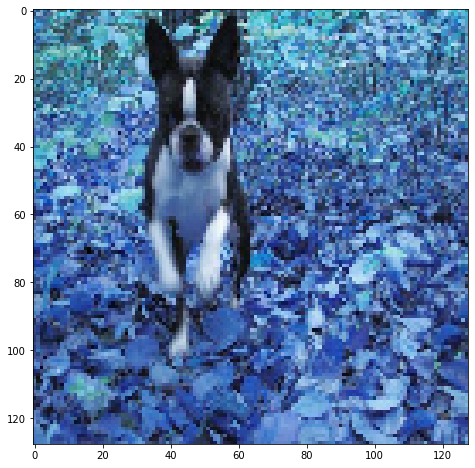

In [0]:
plt.imshow(x_train[0]),y_train[0]

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train[0].shape , len(x_train)

((128, 128, 3), 10222)

In [0]:
num_train_images = len(x_train)
x_train_ndarray = np.empty([num_train_images,img_rows,img_cols,3])
for i in range(num_train_images):
  x_train_ndarray[i] = x_train[i]

In [0]:
x_train_ndarray.shape

(10222, 128, 128, 3)

In [0]:
len(x_train_ndarray[0][1])

128

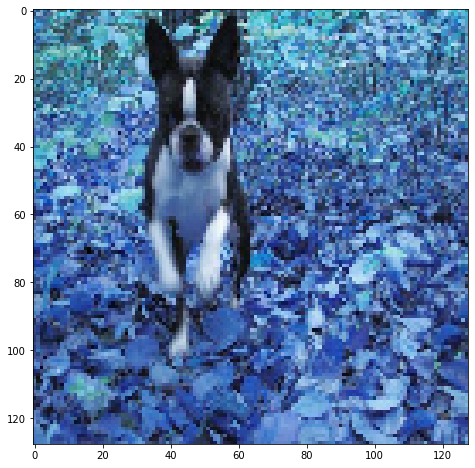

In [0]:
plt.imshow(x_train_ndarray[0].astype('uint8'))

In [0]:
# save ndarray to csv file so we don't re-create it just in case google colab gets disconnected
#np.savetxt('x_train.csv', x_train_ndarray, delimiter=',')
np.save('x_train', x_train_ndarray) 

In [0]:
x_train_ndarray = x_train_ndarray.astype('float32')
x_train_ndarray /= 255

In [0]:
x_train_ndarray.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
t=onehot_encoded_breeds[:int(0.7*num_train_images)]
v=onehot_encoded_breeds[int(0.7*num_train_images):]

len(t),len(v),len(t)+len(v)

(7155, 3067, 10222)

In [0]:
split_at = int(0.7*num_train_images)
x_train_ndarray_train = x_train_ndarray[:split_at]
y_train_train = onehot_encoded_breeds[:split_at]

x_train_ndarray_validation = x_train_ndarray[split_at:]
y_train_validation = onehot_encoded_breeds[split_at:]



In [0]:
x_train_ndarray_train.shape,y_train_train.shape

((7155, 128, 128, 3), (7155, 120))

In [0]:
x_train_ndarray_validation.shape,y_train_validation.shape

((3067, 128, 128, 3), (3067, 120))

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samples_submission_df = pd.read_csv('sample_submission.csv')
samples_submission_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
samples_submission_df.shape

(10357, 121)

In [0]:
test_img = samples_submission_df['id']
type(test_img)

pandas.core.series.Series

In [0]:
test_img[:5]

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:05<00:00, 157.68it/s]


In [0]:
x_test_feature[0].shape

(128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [0]:
#convert list to ndarray  
num_test_images = len(x_test_feature)
x_test_ndarray = np.empty([num_test_images,img_rows,img_cols,3])
for i in range(num_test_images):
  x_test_ndarray[i] = x_test_feature[i]  

In [0]:
#Read train and test data since google colab ran out of memory
x_train = np.load('x_train.npy')

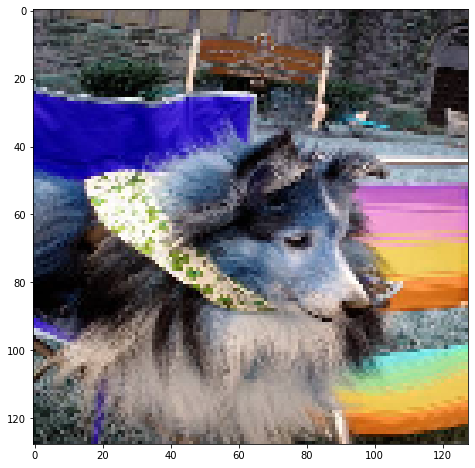

In [0]:
plt.imshow(x_train[10].astype('uint8'))

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
# Define the Type of Model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 5, 5, input_shape=(128, 128, 3)))
#model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3)) #, input_shape=(32, 32, 1)))
#model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
#model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(120,activation='softmax'))
#model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 567,064
Trainable params: 567,064
Non-trainable params: 0
_________________________________________________________________


In [0]:

# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
#model1.fit(x_train_train, y_train_train, batch_size=128, nb_epoch=10, validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)
model1.fit(x_train_train, y_train_train, batch_size=128, epochs=10, validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)
#model1.fit()    

Epoch 1/10
56/56 [==============================] - 1s 24ms/step - loss: 4.7670 - accuracy: 0.0151 - val_loss: 4.7093 - val_accuracy: 0.0209
Epoch 2/10
56/56 [==============================] - 1s 21ms/step - loss: 4.5475 - accuracy: 0.0328 - val_loss: 4.5455 - val_accuracy: 0.0300
Epoch 3/10
56/56 [==============================] - 1s 21ms/step - loss: 4.2664 - accuracy: 0.0657 - val_loss: 4.4536 - val_accuracy: 0.0391
Epoch 4/10
56/56 [==============================] - 1s 22ms/step - loss: 3.9353 - accuracy: 0.1215 - val_loss: 4.5278 - val_accuracy: 0.0421
Epoch 5/10
56/56 [==============================] - 1s 21ms/step - loss: 3.3868 - accuracy: 0.2287 - val_loss: 4.8790 - val_accuracy: 0.0434
Epoch 6/10
56/56 [==============================] - 1s 21ms/step - loss: 2.5056 - accuracy: 0.4098 - val_loss: 5.5407 - val_accuracy: 0.0372
Epoch 7/10
56/56 [==============================] - 1s 22ms/step - loss: 1.5341 - accuracy: 0.6363 - val_loss: 6.4904 - val_accuracy: 0.0355
Epoch 8/10
56

### Use batch_size = 128 and epochs = 10 and execute the model

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=True,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



In [0]:
# Prepare the generator
datagen.fit(x_train_train)

In [0]:
batch_size=128
epochs=10
model1.fit_generator(datagen.flow(x_train_train, y_train_train,batch_size=batch_size),
                    steps_per_epoch=x_train_train.shape[0]//batch_size,
                    epochs=epochs,
                    validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)

Epoch 1/10
55/55 [==============================] - 24s 434ms/step - loss: 4.5835 - accuracy: 0.0236 - val_loss: 10.0726 - val_accuracy: 0.0189
Epoch 2/10
55/55 [==============================] - 24s 432ms/step - loss: 4.5453 - accuracy: 0.0292 - val_loss: 9.3488 - val_accuracy: 0.0209
Epoch 3/10
55/55 [==============================] - 24s 435ms/step - loss: 4.5397 - accuracy: 0.0276 - val_loss: 8.3740 - val_accuracy: 0.0218
Epoch 4/10
55/55 [==============================] - 24s 430ms/step - loss: 4.5212 - accuracy: 0.0285 - val_loss: 10.3236 - val_accuracy: 0.0199
Epoch 5/10
55/55 [==============================] - 24s 437ms/step - loss: 4.5157 - accuracy: 0.0317 - val_loss: 9.4875 - val_accuracy: 0.0222
Epoch 6/10
55/55 [==============================] - 24s 434ms/step - loss: 4.5063 - accuracy: 0.0326 - val_loss: 7.9186 - val_accuracy: 0.0209
Epoch 7/10
55/55 [==============================] - 24s 431ms/step - loss: 4.5088 - accuracy: 0.0330 - val_loss: 8.8490 - val_accuracy: 0.02

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
# Define the Type of Model
model3 = Sequential(name='vgg16_model')
model3.add(base_model)

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(1024))
model3.add(Activation('relu'))

model3.add(Dense(256))
model3.add(Activation('relu'))

# Prediction Layer
model3.add(Dense(120))
model3.add(Activation('softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for l in model3.layers:
    print(l.name, l.trainable)

vgg16 True
flatten_1 True
dense_2 True
activation True
dense_3 True
activation_1 True
dense_4 True
activation_2 True


In [0]:
model3.layers[0].trainable = False
for l in model3.layers:
    print(l.name, l.trainable)

vgg16 False
flatten_1 True
dense_2 True
activation True
dense_3 True
activation_1 True
dense_4 True
activation_2 True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model3.fit(x_train_train, y_train_train, batch_size=128, epochs=10, validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)
    

Epoch 1/10
56/56 [==============================] - 22s 397ms/step - loss: 4.7531 - accuracy: 0.0197 - val_loss: 4.6567 - val_accuracy: 0.0290
Epoch 2/10
56/56 [==============================] - 19s 334ms/step - loss: 4.4227 - accuracy: 0.0563 - val_loss: 4.2120 - val_accuracy: 0.0779
Epoch 3/10
56/56 [==============================] - 19s 335ms/step - loss: 3.9397 - accuracy: 0.1069 - val_loss: 3.8728 - val_accuracy: 0.1144
Epoch 4/10
56/56 [==============================] - 19s 339ms/step - loss: 3.5708 - accuracy: 0.1625 - val_loss: 3.6238 - val_accuracy: 0.1487
Epoch 5/10
56/56 [==============================] - 19s 340ms/step - loss: 3.3144 - accuracy: 0.2008 - val_loss: 3.4901 - val_accuracy: 0.1709
Epoch 6/10
56/56 [==============================] - 19s 341ms/step - loss: 3.1354 - accuracy: 0.2288 - val_loss: 3.3834 - val_accuracy: 0.1849
Epoch 7/10
56/56 [==============================] - 19s 342ms/step - loss: 2.9991 - accuracy: 0.2546 - val_loss: 3.3189 - val_accuracy: 0.1969

In [0]:
# Define the Type of Model
model4 = Sequential(name='vgg16_model')
model4.add(base_model)

# Fully Connected Layer
model4.add(Flatten())
model4.add(Dense(1024))
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

model4.add(Dense(256))
model4.add(Activation('relu'))

# Prediction Layer
model4.add(Dense(120))
model4.add(Activation('softmax'))

# Loss and Optimizer
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model4.fit(x_train_train, y_train_train, batch_size=128, epochs=10, validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)
    


Epoch 1/10
56/56 [==============================] - 19s 343ms/step - loss: 4.8100 - accuracy: 0.0105 - val_loss: 4.7882 - val_accuracy: 0.0114
Epoch 2/10
56/56 [==============================] - 19s 342ms/step - loss: 4.7978 - accuracy: 0.0105 - val_loss: 4.7834 - val_accuracy: 0.0088
Epoch 3/10
56/56 [==============================] - 19s 344ms/step - loss: 4.7877 - accuracy: 0.0126 - val_loss: 4.7813 - val_accuracy: 0.0088
Epoch 4/10
56/56 [==============================] - 19s 345ms/step - loss: 4.7856 - accuracy: 0.0103 - val_loss: 4.7801 - val_accuracy: 0.0098
Epoch 5/10
56/56 [==============================] - 19s 343ms/step - loss: 4.7807 - accuracy: 0.0130 - val_loss: 4.7785 - val_accuracy: 0.0091
Epoch 6/10
56/56 [==============================] - 19s 342ms/step - loss: 4.7805 - accuracy: 0.0113 - val_loss: 4.7771 - val_accuracy: 0.0095
Epoch 00006: early stopping


In [0]:
#Let's see if Data Augmentation helps model4
batch_size=128
epochs=10
model4.fit_generator(datagen.flow(x_train_train, y_train_train,batch_size=batch_size),
                    steps_per_epoch=x_train_train.shape[0]//batch_size,
                    epochs=epochs,
                    validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)

Epoch 1/10
55/55 [==============================] - 37s 664ms/step - loss: 4.7808 - accuracy: 0.0132 - val_loss: 4.7772 - val_accuracy: 0.0091
Epoch 2/10
55/55 [==============================] - 35s 636ms/step - loss: 4.7815 - accuracy: 0.0131 - val_loss: 4.7771 - val_accuracy: 0.0117
Epoch 3/10
55/55 [==============================] - 35s 638ms/step - loss: 4.7775 - accuracy: 0.0137 - val_loss: 4.7753 - val_accuracy: 0.0127
Epoch 4/10
55/55 [==============================] - 35s 642ms/step - loss: 4.7766 - accuracy: 0.0118 - val_loss: 4.7751 - val_accuracy: 0.0134
Epoch 5/10
55/55 [==============================] - 35s 637ms/step - loss: 4.7783 - accuracy: 0.0118 - val_loss: 4.7737 - val_accuracy: 0.0137
Epoch 6/10
55/55 [==============================] - 35s 643ms/step - loss: 4.7741 - accuracy: 0.0139 - val_loss: 4.7736 - val_accuracy: 0.0121
Epoch 7/10
55/55 [==============================] - 35s 643ms/step - loss: 4.7731 - accuracy: 0.0149 - val_loss: 4.7725 - val_accuracy: 0.0124

In [0]:
#Let's see if Data Augmentation helps model3
batch_size=128
epochs=10
model3.fit_generator(datagen.flow(x_train_train, y_train_train,batch_size=batch_size),
                    steps_per_epoch=x_train_train.shape[0]//batch_size,
                    epochs=epochs,
                    validation_data=(x_train_validation, y_train_validation), callbacks=callback_list)

Epoch 1/10
55/55 [==============================] - 36s 646ms/step - loss: 3.7283 - accuracy: 0.1611 - val_loss: 3.3338 - val_accuracy: 0.1976
Epoch 2/10
55/55 [==============================] - 35s 645ms/step - loss: 3.6562 - accuracy: 0.1601 - val_loss: 3.3037 - val_accuracy: 0.2025
Epoch 3/10
55/55 [==============================] - 35s 641ms/step - loss: 3.6376 - accuracy: 0.1550 - val_loss: 3.2536 - val_accuracy: 0.2074
Epoch 4/10
55/55 [==============================] - 35s 645ms/step - loss: 3.5915 - accuracy: 0.1678 - val_loss: 3.2485 - val_accuracy: 0.2051
Epoch 5/10
55/55 [==============================] - 35s 644ms/step - loss: 3.6159 - accuracy: 0.1665 - val_loss: 3.2482 - val_accuracy: 0.2136
Epoch 6/10
55/55 [==============================] - 35s 641ms/step - loss: 3.5843 - accuracy: 0.1664 - val_loss: 3.2407 - val_accuracy: 0.2113
Epoch 7/10
55/55 [==============================] - 35s 645ms/step - loss: 3.5864 - accuracy: 0.1689 - val_loss: 3.2363 - val_accuracy: 0.2090